In [1]:
%matplotlib inline


# OT for image color adaptation


This example presents a way of transferring colors between two image
with Optimal Transport as introduced in [6]

[6] Ferradans, S., Papadakis, N., Peyre, G., & Aujol, J. F. (2014).
Regularized discrete optimal transport.
SIAM Journal on Imaging Sciences, 7(3), 1853-1882.



In [2]:
# Authors: Remi Flamary <remi.flamary@unice.fr>
#          Stanislas Chambon <stan.chambon@gmail.com>
#
# License: MIT License

import numpy as np
from scipy import ndimage
import matplotlib.pylab as pl
import ot


r = np.random.RandomState(42)


def im2mat(I):
    """Converts and image to matrix (one pixel per line)"""
    return I.reshape((I.shape[0] * I.shape[1], I.shape[2]))


def mat2im(X, shape):
    """Converts back a matrix to an image"""
    return X.reshape(shape)


def minmax(I):
    return np.clip(I, 0, 1)

Generate data
-------------



In [3]:
# Loading images
I1 = ndimage.imread('../data/ocean_day.jpg').astype(np.float64) / 256
I2 = ndimage.imread('../data/ocean_sunset.jpg').astype(np.float64) / 256

X1 = im2mat(I1)
X2 = im2mat(I2)

# training samples
nb = 1000
idx1 = r.randint(X1.shape[0], size=(nb,))
idx2 = r.randint(X2.shape[0], size=(nb,))

Xs = X1[idx1, :]
Xt = X2[idx2, :]

Plot original image
-------------------



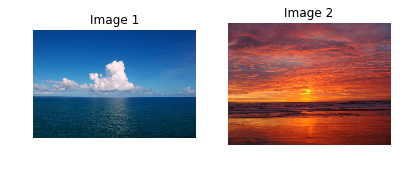

In [4]:
pl.figure(1, figsize=(6.4, 3))

pl.subplot(1, 2, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2')

Scatter plot of colors
----------------------



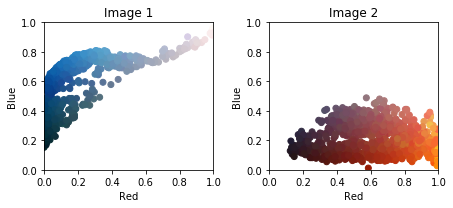

In [5]:
pl.figure(2, figsize=(6.4, 3))

pl.subplot(1, 2, 1)
pl.scatter(Xs[:, 0], Xs[:, 2], c=Xs)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 1')

pl.subplot(1, 2, 2)
pl.scatter(Xt[:, 0], Xt[:, 2], c=Xt)
pl.axis([0, 1, 0, 1])
pl.xlabel('Red')
pl.ylabel('Blue')
pl.title('Image 2')
pl.tight_layout()

Instantiate the different transport algorithms and fit them
-----------------------------------------------------------



In [6]:
# EMDTransport
ot_emd = ot.da.EMDTransport()
ot_emd.fit(Xs=Xs, Xt=Xt)

# SinkhornTransport
ot_sinkhorn = ot.da.SinkhornTransport(reg_e=1e-1)
ot_sinkhorn.fit(Xs=Xs, Xt=Xt)

# prediction between images (using out of sample prediction as in [6])
transp_Xs_emd = ot_emd.transform(Xs=X1)
transp_Xt_emd = ot_emd.inverse_transform(Xt=X2)

transp_Xs_sinkhorn = ot_emd.transform(Xs=X1)
transp_Xt_sinkhorn = ot_emd.inverse_transform(Xt=X2)

I1t = minmax(mat2im(transp_Xs_emd, I1.shape))
I2t = minmax(mat2im(transp_Xt_emd, I2.shape))

I1te = minmax(mat2im(transp_Xs_sinkhorn, I1.shape))
I2te = minmax(mat2im(transp_Xt_sinkhorn, I2.shape))

Plot new images
---------------



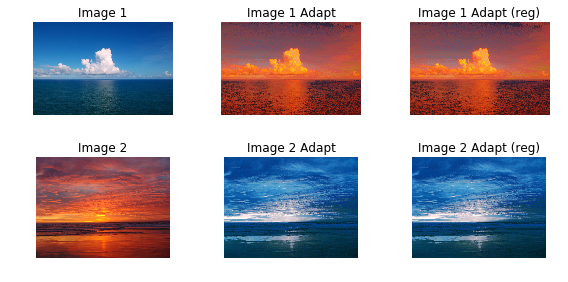

In [7]:
pl.figure(3, figsize=(8, 4))

pl.subplot(2, 3, 1)
pl.imshow(I1)
pl.axis('off')
pl.title('Image 1')

pl.subplot(2, 3, 2)
pl.imshow(I1t)
pl.axis('off')
pl.title('Image 1 Adapt')

pl.subplot(2, 3, 3)
pl.imshow(I1te)
pl.axis('off')
pl.title('Image 1 Adapt (reg)')

pl.subplot(2, 3, 4)
pl.imshow(I2)
pl.axis('off')
pl.title('Image 2')

pl.subplot(2, 3, 5)
pl.imshow(I2t)
pl.axis('off')
pl.title('Image 2 Adapt')

pl.subplot(2, 3, 6)
pl.imshow(I2te)
pl.axis('off')
pl.title('Image 2 Adapt (reg)')
pl.tight_layout()

pl.show()